/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: WavFileWarning: Reached EOF prematurely; finished at 9240620 bytes, expected 9240625 bytes from header.
  # Remove the CWD from sys.path while we load stuff.


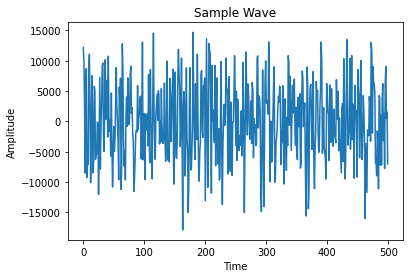

In [2]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import hilbert, chirp
import numpy as np
import scipy.signal

mpl.rcParams['agg.path.chunksize'] = 10000

input = read("190422.wav")
audio = input[1]
plt.figure()
plt.plot(audio[4000:4500])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wave")
plt.savefig("wave.png")

audio = np.array(audio, dtype=float)
n_data = (audio - 128) / 128

analytic_signal = hilbert(n_data)
amplitude_envelope = np.abs(analytic_signal)

resampled = scipy.signal.resample(amplitude_envelope, int(len(amplitude_envelope)/(5512/2080)))

resampled = resampled[0:len(resampled) - int(len(resampled)%2080)]

new_data = np.reshape(resampled, (int(len(resampled)/2080), 2080))

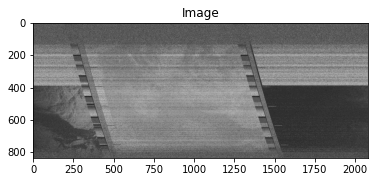

In [3]:
plt.figure()
# Последний элемент убираем, потому что он (может быть) заполнен не полностью
plt.imshow(new_data[:-1], cmap='gray')
plt.title('Image')
plt.savefig("image.png")

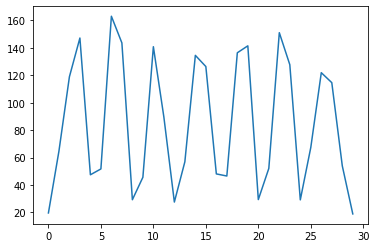

In [4]:
sinch = new_data[430][360+1040:390+1040]
plt.figure()
plt.plot(sinch)
plt.savefig("sinch.png")

In [5]:
zros = np.zeros(((int(len(resampled)/2080), 0)))
new_data_buffered = np.hstack((new_data, zros))

deltas = []

for i in range(np.shape(new_data_buffered)[0]):
    deltas.clear()
    for j in range(1250, 1700):
        delta = (new_data_buffered[i][j:j+len(sinch)] - sinch)**2
        deltas.append(np.sum(delta))
        minimal = deltas.index(min(deltas))
    new_data_buffered[i] = np.roll(new_data_buffered[i], -(1250+minimal))

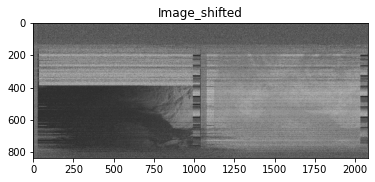

In [6]:
plt.figure()
# Последний элемент убираем, потому что он (может быть) заполнен не полностью
plt.imshow(new_data_buffered[:-1], cmap='gray')
plt.title('Image_shifted')
plt.savefig("image_shifted.png")
plt.show()

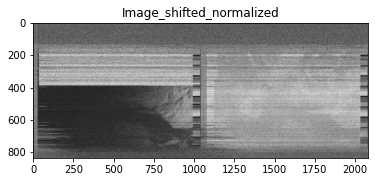

In [7]:
telemetry_array = new_data_buffered[600:800, 1000:1010]

min = np.min(telemetry_array)
max = np.max(telemetry_array)

convert = np.polyfit([min, max], [0, 1], 1)

for i in range(np.shape(new_data_buffered)[0]):
    for j in range(np.shape(new_data_buffered)[1]):
        new_data_buffered[i][j] = np.polyval(convert, new_data_buffered[i][j])

        if new_data_buffered[i][j] >= 1:
            new_data_buffered[i][j] = 1

        if new_data_buffered[i][j] <= 0:
            new_data_buffered[i][j] = 0

new_data_buffered *= 255

plt.figure()
# Последний элемент убираем, потому что он (может быть) заполнен не полностью
plt.imshow(new_data_buffered[:-1], cmap='gray')
plt.title('Image_shifted_normalized')
plt.savefig("image_shifted_normalized.png")

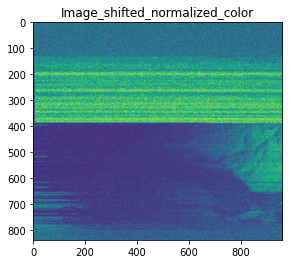

In [42]:
plt.figure()
# Последний элемент убираем, потому что он (может быть) заполнен не полностью
plt.imshow(new_data_buffered[:,len(sinch):990], cmap='viridis')
plt.title('Image_shifted_normalized_color')
plt.savefig("image_shifted_normalized_color.png")